Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


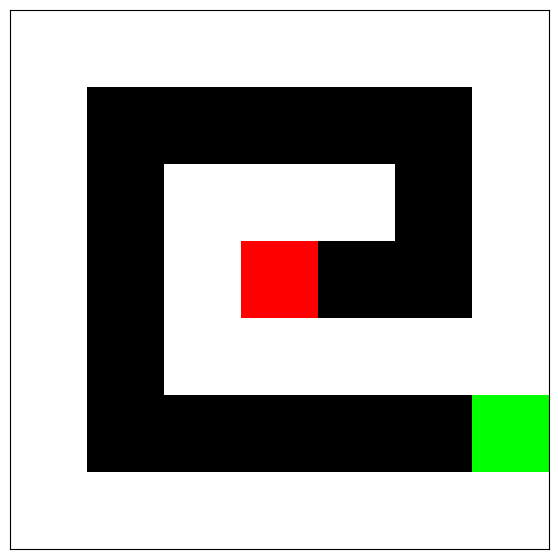

In [36]:
import matplotlib.pyplot as plt
import numpy as np
# Define the maze
maze = [[1, 1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1]]
# Convert the maze to a numpy array for plotting
maze_array = np.array(maze)
# Inverting the maze colors for a black background
# Convert the maze to an RGB format if it isn't already
if maze_array.ndim == 2:  # If the array is 2D (grayscale), convert to 3D (RGB)
    maze_rgb = np.zeros((*maze_array.shape, 3))  # Create a new RGB array
    for i in range(3):  # Copy the grayscale values into each RGB channel
        maze_rgb[:, :, i] = maze_array
else:
    maze_rgb = maze_array.copy()  # If it's already RGB, just make a copy

# Set the (3,3) pixel to green
maze_rgb[3, 3] = [1, 0, 0]  # RGB for green

#
maze_rgb[5, 6] = [0, 2, 0]  # RGB for green
# Plotting
plt.figure(figsize=(7, 7))
plt.imshow(maze_rgb, interpolation='nearest')
plt.xticks([]), plt.yticks([])  # Hide axes ticks
plt.show()

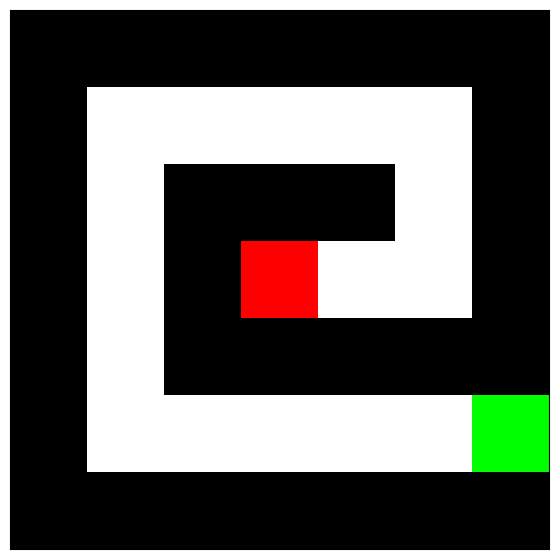

In [3]:
import matplotlib.pyplot as plt
import numpy as np

class Maze:
    def __init__(self):
        """Initialize the maze with a given layout."""
        maze_layout = [[1, 1, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 1, 1, 1, 1, 1, 1]]
        self.layout = np.array(maze_layout)
        self.rgb_maze = self._to_rgb()

    def _to_rgb(self):
        """Convert the maze layout to an RGB image."""
        if self.layout.ndim == 2:  # If the layout is 2D (grayscale), convert to 3D (RGB)
            rgb = np.zeros((*self.layout.shape, 3))  # Create a new RGB array
            for i in range(3):  # Copy the grayscale values into each RGB channel
                # Inverting colors: 1 becomes black, 0 becomes white
                rgb[:, :, i] = 1 - self.layout
            return rgb
        else:
            return self.layout.copy()  # If it's already RGB, just make a copy

    def set_point(self, row, col, color):
        """Set a specific point in the maze to a given color."""
        if 0 <= row < self.rgb_maze.shape[0] and 0 <= col < self.rgb_maze.shape[1]:
            self.rgb_maze[row, col] = color
        else:
            print(f"Point ({row}, {col}) is out of the maze bounds.")

    def plot(self):
        """Plot the maze."""
        plt.figure(figsize=(7, 7))
        plt.imshow(self.rgb_maze, interpolation='nearest')
        plt.xticks([]), plt.yticks([])  # Hide axes ticks
        plt.show()

maze = Maze()
maze.set_point(3, 3, [1, 0, 0])  # Setting a point to green
maze.set_point(5, 6, [0, 1, 0])  # Another point to green, correctly this time
maze.plot()

In [5]:
class MazeGame:
    def __init__(self, layout):
        """Initialize the maze game with a given layout."""
        self.layout = np.array(layout)
        self.rgb_maze = self._to_rgb()
        self.position = None  # Initial position will be set separately

    def _to_rgb(self):
        """Convert the maze layout to an RGB image."""
        rgb = np.zeros((*self.layout.shape, 3))  # Create a new RGB array
        for i in range(3):
            rgb[:, :, i] = 1 - self.layout  # Invert colors: 1 becomes black, 0 becomes white
        return rgb

    def set_initial_position(self, row, col):
        """Set the initial position of the player."""
        if self.layout[row, col] == 0:  # Ensure initial position is not a wall
            self.position = (row, col)
            self.set_point(row, col, [0, 0, 1])  # Mark initial position with blue
        else:
            print("Invalid initial position. It's either outside the maze or a wall.")

    def set_point(self, row, col, color):
        """Set a specific point in the maze to a given color."""
        self.rgb_maze[row, col] = color

    def make_move(self, direction):
        """Move the player in the specified direction if possible."""
        if self.position is None:
            print("Initial position is not set.")
            return False

        moves = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}
        if direction in moves:
            delta_row, delta_col = moves[direction]
            new_position = (self.position[0] + delta_row, self.position[1] + delta_col)
            if self._is_valid_move(*new_position):
                self._update_position(*new_position)
                return True
            else:
                print("Move not allowed.")
                return False
        else:
            print("Invalid direction.")
            return False

    def _is_valid_move(self, row, col):
        """Check if the new position is a valid move."""
        if (0 <= row < self.layout.shape[0]) and (0 <= col < self.layout.shape[1]):
            return self.layout[row, col] == 0
        return False

    def _update_position(self, row, col):
        """Update the player's position on the maze."""
        self.set_point(*self.position, [1, 1, 1])  # Reset current position to white
        self.position = (row, col)
        self.set_point(row, col, [0, 0, 1])  # Mark new position with blue

    def success_out(self):
        """Check if the player has reached the border (success condition)."""
        row, col = self.position
        if row == 0 or row == self.layout.shape[0] - 1 or col == 0 or col == self.layout.shape[1] - 1:
            print("Success! You've reached the border.")
            return True
        return False

    def plot(self):
        """Plot the maze with the current player position."""
        plt.figure(figsize=(7, 7))
        plt.imshow(self.rgb_maze, interpolation='nearest')
        plt.xticks([]), plt.yticks([])  # Hide axes ticks
        plt.show()

# Example usage
maze_layout = [[1, 1, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 1, 1, 1, 1, 1, 1]]

game = MazeGame(maze_layout)
game.set_initial_position(5, 1)  # Starting point
game.make_move


<bound method MazeGame.make_move of <__main__.MazeGame object at 0x153c0be50>>

In [6]:
class MazeGame:
    def __init__(self):
        maze_layout = [[1, 1, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 0, 1],
               [1, 0, 1, 0, 0, 0, 1],
               [1, 0, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 1, 1, 1, 1, 1, 1]]
        """Initialize the maze game with a given layout."""
        self.layout = np.array(maze_layout)
        self.rgb_maze = self._to_rgb()
        self.start_pos = None
        self.exit_pos = None
        self.current_pos = None

    def _to_rgb(self):
        """Convert the maze layout to an RGB image."""
        rgb = np.zeros((*self.layout.shape, 3))  # Create a new RGB array
        for i in range(3):  # Copy the grayscale values into each RGB channel
            rgb[:, :, i] = 1 - self.layout
        return rgb

    def initialPosition(self, row, col):
        """Set the initial position in the maze."""
        if self.layout[row, col] == 0:
            self.start_pos = (row, col)
            self.current_pos = (row, col)
            self.set_point(row, col, [0, 0, 1])  # Mark initial position with blue
        else:
            print("Invalid initial position: It is on a wall.")

    def setExit(self, row, col):
        """Set the exit position in the maze."""
        if self.layout[row, col] == 0:
            self.exit_pos = (row, col)
            self.set_point(row, col, [1, 0, 0])  # Mark exit position with red
        else:
            print("Invalid exit position: It is on a wall.")

    def set_point(self, row, col, color):
        """Set a specific point in the maze to a given color."""
        self.rgb_maze[row, col] = color

    def makeMove(self, direction):
        """Attempt to move in the specified direction."""
        if self.current_pos is None:
            print("Initial position not set.")
            return

        row, col = self.current_pos
        if direction == "up":
            new_pos = (row - 1, col)
        elif direction == "down":
            new_pos = (row + 1, col)
        elif direction == "left":
            new_pos = (row, col - 1)
        elif direction == "right":
            new_pos = (row, col + 1)
        else:
            print("Invalid direction.")
            return

        if self.isValidMove(new_pos):
            self.current_pos = new_pos
            self.set_point(*self.start_pos, [1 - self.layout[self.start_pos]])  # Reset start position color
            self.start_pos = new_pos
            self.set_point(*new_pos, [0, 0, 1])  # Mark new position with blue
            if self.current_pos == self.exit_pos:
                print("Success! You've found the way out.")
        else:
            print("Invalid move: Can't move through walls or out of bounds.")

    def isValidMove(self, pos):
        """Check if a move is valid (within bounds and not through walls)."""
        row, col = pos
        if 0 <= row < self.layout.shape[0] and 0 <= col < self.layout.shape[1]:
            return self.layout[row, col] == 0
        return False

    def plot(self):
        """Plot the maze."""
        plt.figure(figsize=(7, 7))
        plt.imshow(self.rgb_maze, interpolation='nearest')
        plt.xticks([]), plt.yticks([])  # Hide axes ticks
        plt.show()

Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.


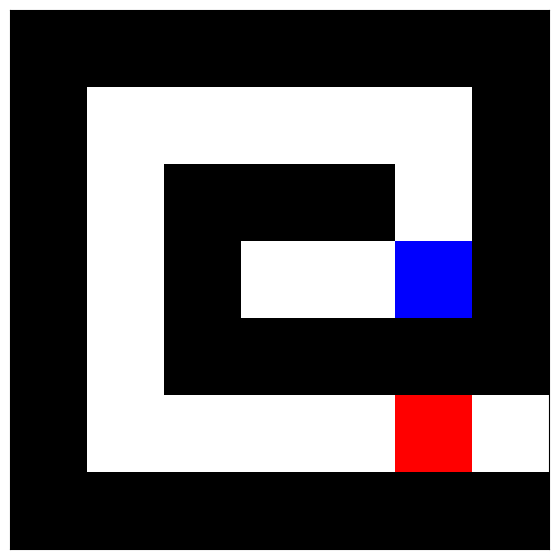

In [8]:
# Create an instance of MazeGame
maze_game = MazeGame()

# Set the initial and exit positions
maze_game.initialPosition(1, 1)
maze_game.setExit(5, 5)

# Make a series of moves to navigate through the maze
moves = ["right", "right", "right", "right", "down", "down", "down", "down", "right"]

for move in moves:
    maze_game.makeMove(move)
    if maze_game.current_pos == maze_game.exit_pos:
        print("Reached the exit successfully!")
        break

# Plot the final state of the maze
maze_game.plot()

In [12]:
import random

class QLearningAgent:
    def __init__(self, game, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.game = game
        self.q_table = np.zeros((game.layout.size, 4))  # 4 actions: up, down, left, right
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = ['up', 'down', 'left', 'right']

    def state_to_index(self, state):
        """Converts a 2D state to a 1D index for the Q-table."""
        return state[0] * self.game.layout.shape[1] + state[1]

    def choose_action(self, state_index):
        """Choose action based on ε-greedy policy."""
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.actions)  # Explore
        else:
            return self.actions[np.argmax(self.q_table[state_index])]  # Exploit

    def learn(self, state, action, reward, next_state):
        """Update the Q-value using the Q-learning formula."""
        state_index = self.state_to_index(state)
        next_state_index = self.state_to_index(next_state)
        action_index = self.actions.index(action)
        next_max = np.max(self.q_table[next_state_index])

        # Q-learning formula
        self.q_table[state_index, action_index] = self.q_table[state_index, action_index] + \
            self.alpha * (reward + self.gamma * next_max - self.q_table[state_index, action_index])

    def train(self, episodes=1000):
        for episode in range(episodes):
            self.game.initialPosition(3, 3)  # Reset to starting position
            state = self.game.current_pos
            steps = 0
            while not self.game.makeMove(self.choose_action(self.state_to_index(state))) and steps < 50:
                # Select and perform an action
                action = self.choose_action(self.state_to_index(state))
                old_state = state
                success = self.game.makeMove(action)
                state = self.game.current_pos
                reward = 1 if success else -1  # Simple reward: -1 for each step, +1 for reaching the goal
                # Learn from the transition
                self.learn(old_state, action, reward, state)
                steps += 1
            if episode % 100 == 0:
                print(f"Episode {episode}: completed in {steps} steps.")

agent = QLearningAgent(maze_game)
agent.train(1000)

Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move through walls or out of bounds.
Invalid move: Can't move throug

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



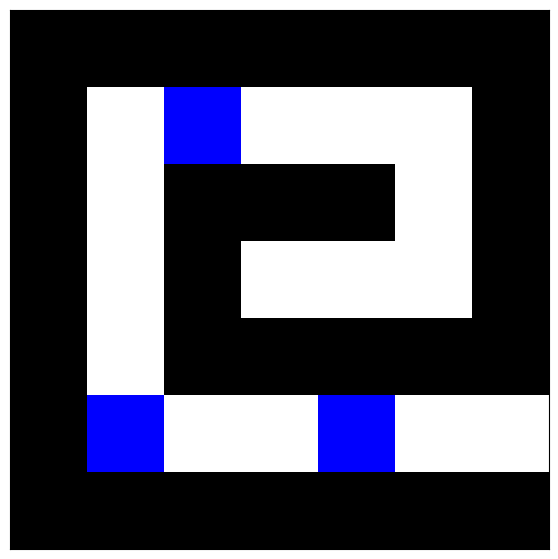

Starting test from position: (5, 1)
Step 1: Moved up, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 2: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 3: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 4: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 5: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 6: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 7: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 8: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 9: Moved right, New position: (4, 1)
Invalid move: Can't move through walls or out of bounds.
Step 10: Moved right, New position: (4, 1)
Invalid move: Can't move through 

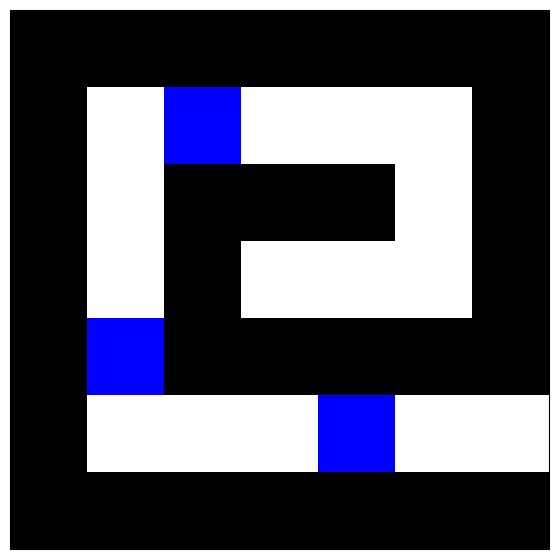

In [13]:
def test_agent(agent, game, max_steps=50):
    game.initialPosition(5, 1)  # Reset to starting position
    state = game.current_pos
    steps = 0
    success = False

    # Display the initial state of the maze
    game.plot()
    print(f"Starting test from position: {state}")

    while not success and steps < max_steps:
        state_index = agent.state_to_index(state)
        action = agent.actions[np.argmax(agent.q_table[state_index])]  # Choose best action
        success = game.makeMove(action)  # Perform the action
        state = game.current_pos  # Update state
        steps += 1
        print(f"Step {steps}: Moved {action}, New position: {state}")

        # Optionally, display the maze at each step
        # game.plot()

    if success:
        print("Success! The agent found the way out.")
    else:
        print("Failed to find the way out within the maximum allowed steps.")
    # Display the final state of the maze
    game.plot()

# Now, let's test the trained agent.
test_agent(agent, maze_game)
